# PandaRoot Simulation Plots

Plots of the **MC points** in the tracking systems of the PANDA detector, created with PandaRoot.

## Python Imports

Import the required python packages

In [12]:
# python IO for ROOT files
import uproot

# to render latex in prints
from IPython.display import display, Latex

# numpy
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# %matplotlib widget

# Seaborn for plotting and styling
import seaborn as sns

# Pandas for data manipulation
import pandas as pd

# to get access to the pdg database 2024 version
import pdg

from utils.data_processing import (
    get_branch_entry,
    make_track_dict,
    get_all_mother_ids,
    get_process_ids,
    get_process_tex_str,
    is_signal_particle,
)

from utils.plotting import plotSTT

PdgApi = pdg.connect(
    "sqlite:////home/nikin105/mlProject/data/pdg/pdgall-2024-v0.1.0.sqlite"
)

## IO Paths

Get/set the paths to the input and output files.

Name of the simulations (prefix) that should be plotted:

In [2]:
projectName = "new_XiAntiXi"

Path where the images should be saved

In [3]:
imagePath = "/home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/" + projectName
print("Images will be saved in", imagePath)

Images will be saved in /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi


Path to the simulation ROOT file

In [4]:
# simFile = os.getenv("SIM_FILE_PATH")  + "/" + projectName + "/root/" + projectName + "_sim.root"
simFile = "/home/nikin105/mlProject/data/simulations/XiAntiXi/test/test_sim.root"
print("Input simulation file: ", simFile)

Input simulation file:  /home/nikin105/mlProject/data/simulations/XiAntiXi/test/test_sim.root


## Simulation Parameters

### Description: MC Track Parameters - `MCTrack`

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| PdgCode			|														|		| Int_t			| PndMCTrack						|
| P(x,y,z)			|														|		| Double32_t	| PndMCTrack						|
| E					|														|		| Double32_t	| PndMCTrack						|
| MotherID			|														|		| Int_t			| PndMCTrack						|
| SecondMotherID	|														|		| Int_t			| PndMCTrack						|
| GeneratorFlags	|														|		| Int_t			| PndMCTrack						|
| Start(X,Y,Z)		|														|		| Double32_t	| PndMCTrack						|
| StartT			|														|		| Double32_t	| PndMCTrack						|
| Points			|														|		| Int_t			| PndMCTrack						|
| Process			|														|		| UInt_t		| PndMCTrack						|

Points code

   *  EMC:  Bit  8 -  9  (2 bit max. value 3)
   *  STT:  Bit 10 - 11  (2 bit max. value 3)
   *  TPC:  Bit 12 - 13  (2 bit max. value 3)
   *  TOF:  Bit 14 - 15  (2 bit max. value 3)
   *  GEM:  Bit 16 - 17  (2 bit max. value 3)
   *  DSK:  Bit 18 - 19  (2 bit max. value 3)
   *  HYP:  Bit 20 - 21  (2 bit max. value 3)
   *  RPC:  Bit 22 - 23  (2 bit max. value 3)
   *  LUMI: Bit 24 - 25  (2 bit max. value 3)
   *  HYPG: Bit 26 - 27  (2 bit max. value 3)
   *  FTS:  Bit 28 - 29  (2 bit max. value 3)
   *   OT:  Bit 30 - 31  (2 bit max. value 3)

### Description: Straw Tube Detector (STT) Parameters - `STTPoint`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TrackID			| Track index											| -		| Int_t			| FairMCPoint						|
| EventId			| MC Event id											| -		| UInt_t		| FairMCPoint						|
| P(x,y,z)			| Momentum components									| GeV	| Double32_t	| FairMCPoint						|
| Time				| Time since event start								| ns	| Double32_t	| FairMCPoint						|
| Length			| Track length since creation							| cm	| Double32_t	| FairMCPoint						|
| ELoss				| Energy loss at this point								| GeV	| Double32_t	| FairMCPoint						|
| DetectorID		| Detector unique identifier 							| -		| Int_t			| FairMCPoint						|
| (X,Y,Z)			| Position of hit 										| cm	| Double32_t	| FairMCPoint						|
| (X,Y,Z)_out_local	| Exit coordinates in straw frame						|		| Double_t		| PndSttPoint						|
| (X,Y,Z)_in_local	| Entry coordinates in straw frame						|		| Double_t		| PndSttPoint						|
| P(x,y,z)_in		| *unused member*										|		| Double_t		| PndSttPoint						|
| P(x,y,z)_out		| 														|		| Double_t		| PndSttPoint						|
| Mass				| Particle mass											|		| Double_t		| PndSttPoint						|
| TubeID			| Tube ID												|		| Int_t			| PndSttPoint						|

### Description: Micro Vertex Detector (MVD) Parameters - `MVDPoint`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TrackID			| Track index											| -		| Int_t			| FairMCPoint						|
| EventId			| MC Event id											| -		| UInt_t		| FairMCPoint						|
| P(x,y,z)			| Momentum components									| GeV	| Double32_t	| FairMCPoint						|
| Time				| Time since event start								| ns	| Double32_t	| FairMCPoint						|
| Length			| Track length since creation							| cm	| Double32_t	| FairMCPoint						|
| ELoss				| Energy loss at this point								| GeV	| Double32_t	| FairMCPoint						|
| DetectorID		| Detector unique identifier 							| -		| Int_t			| FairMCPoint						|
| (X,Y,Z)			| Position of hit 										| cm	| Double32_t	| FairMCPoint						|
| (X,Y,Z)Out		| 														|		| Double32_t	| PndMCPoint						|
| P(x,y,z)Out		| 														|		| Double32_t	| PndMCPoint						|
| SensorID			| 														|		| Int_t			| PndSdsMCPoint 					|

### Set the Parameters

In [5]:
entry_id = 4

sim_tree = uproot.open(
    simFile + ":pndsim",
)

# Get STT geometry
data = pd.read_csv("/home/nikin105/mlProject/data/detectorGeometries/tubePos.csv")
data.columns = data.columns.str.strip()

# Make a list with the names of the MCTrack parameter to be read
mc_track_parameter_names = [
    "PdgCode",
    "MotherID",
    "SecondMotherID",
    "StartX",
    "StartY",
    "StartZ",
    "GeneratorFlags",
    "Process",
]

# Define a dictionary to store the MCTrack parameters
mc_track = {}

# Loop over all listed MCTrack parameters and get their values for the given entry
for branch_index in range(len(mc_track_parameter_names)):
    mc_track_parameter_name = mc_track_parameter_names[branch_index]
    mc_track_branch_name = "MCTrack.f" + mc_track_parameter_name
    mc_track[mc_track_parameter_name] = get_branch_entry(
        entry_id, mc_track_branch_name, sim_tree
    )

# Make a list with the names of the STTPoint parameter to be read
stt_point_parameter_names = [
    "X",
    "Y",
    "Z",
    "Px",
    "Py",
    "Pz",
    "Time",
    "ELoss",
    "TubeID",
    "TrackID",
]

# Define a dictionary to store the STTPoint parameters
stt_point = {}

# Loop over all listed STTPoint parameters and get their values for the given entry
for branch_index in range(len(stt_point_parameter_names)):
    stt_point_parameter_name = stt_point_parameter_names[branch_index]
    stt_point_branch_name = "STTPoint.f" + stt_point_parameter_name
    stt_point[stt_point_parameter_name] = get_branch_entry(
        entry_id, stt_point_branch_name, sim_tree
    )

# Normalize the xy-projections of the momenta
stt_totMom = np.sqrt(stt_point["Px"] ** 2 + stt_point["Py"] ** 2)

stt_normPx = stt_point["Px"] / stt_totMom
stt_normPy = stt_point["Py"] / stt_totMom

# get the absolute momenta
stt_p = np.sqrt(stt_point["Px"] ** 2 + stt_point["Py"] ** 2 + stt_point["Pz"] ** 2)

# Define dictionaries with the trackID as the key and arrays with x, y & z coordinates and momenta as the values
xPointsPerTrack = {}
xPointsPerTrack = make_track_dict(stt_point["TrackID"], stt_point["X"], xPointsPerTrack)

yPointsPerTrack = {}
yPointsPerTrack = make_track_dict(stt_point["TrackID"], stt_point["Y"], yPointsPerTrack)

zPointsPerTrack = {}
zPointsPerTrack = make_track_dict(stt_point["TrackID"], stt_point["Z"], zPointsPerTrack)

xMomentaPerTrack = {}
xMomentaPerTrack = make_track_dict(
    stt_point["TrackID"], stt_point["Px"], xMomentaPerTrack
)

yMomentaPerTrack = {}
yMomentaPerTrack = make_track_dict(
    stt_point["TrackID"], stt_point["Py"], yMomentaPerTrack
)

zMomentaPerTrack = {}
zMomentaPerTrack = make_track_dict(
    stt_point["TrackID"], stt_point["Pz"], zMomentaPerTrack
)

tubeIDPerTrack = {}
tubeIDPerTrack = make_track_dict(
    stt_point["TrackID"], stt_point["TubeID"], tubeIDPerTrack
)

In [10]:
mother_ids = get_all_mother_ids(mc_track["MotherID"], mc_track["SecondMotherID"])

signal_processes = [
    [88888, 3312],  # ppbar -> Xi-
    [88888, -3312],  # ppbar -> anti-Xi+
    [88888, 3312, -211],  # ppbar -> Xi- -> pi-
    [88888, -3312, 211],  # ppbar -> anti-Xi+ -> pi+
    [88888, 3312, 3122],  # ppbar -> Xi- -> Lambda0
    [88888, -3312, -3122],  # ppbar -> anti-Xi+ -> anti-Lambda0
    [88888, 3312, 3122, -211],  # ppbar -> Xi- -> Lambda0 -> pi-
    [88888, -3312, -3122, 211],  # ppbar -> anti-Xi+ -> anti-Lambda0 -> pi+
    [88888, 3312, 3122, 2212],  # ppbar -> Xi- -> Lambda0 -> p
    [88888, -3312, 3122, 2212],  # ppbar -> anti-Xi+ -> anti-Lambda0 -> anti-p
]

signal_process_ids = [
    [0, 0],
    [0, 0, 4],
    [0, 0, 4, 4],
]

for trackID in xPointsPerTrack:
    process_mc_ids, process_ids = get_process_ids(
        mc_track["Process"], mother_ids, mc_track["PdgCode"], int(trackID)
    )
    print("Is signal particle: ",
        is_signal_particle(
            process_mc_ids, process_ids, signal_processes, signal_process_ids
        )
    )
    process_tex_str = get_process_tex_str(process_mc_ids)
    display(Latex(f"${process_tex_str}_{{{trackID}}}$"))

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  False


<IPython.core.display.Latex object>

Is signal particle:  False


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

## Plots

### xy-Projections with Colormaps for various Parameters


#### z-Position

Min z:  -39.8950080871582  cm
Max z:  109.8746566772461  cm
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi/xyProjectionZ_4.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi/xyProjectionZ_4.pdf


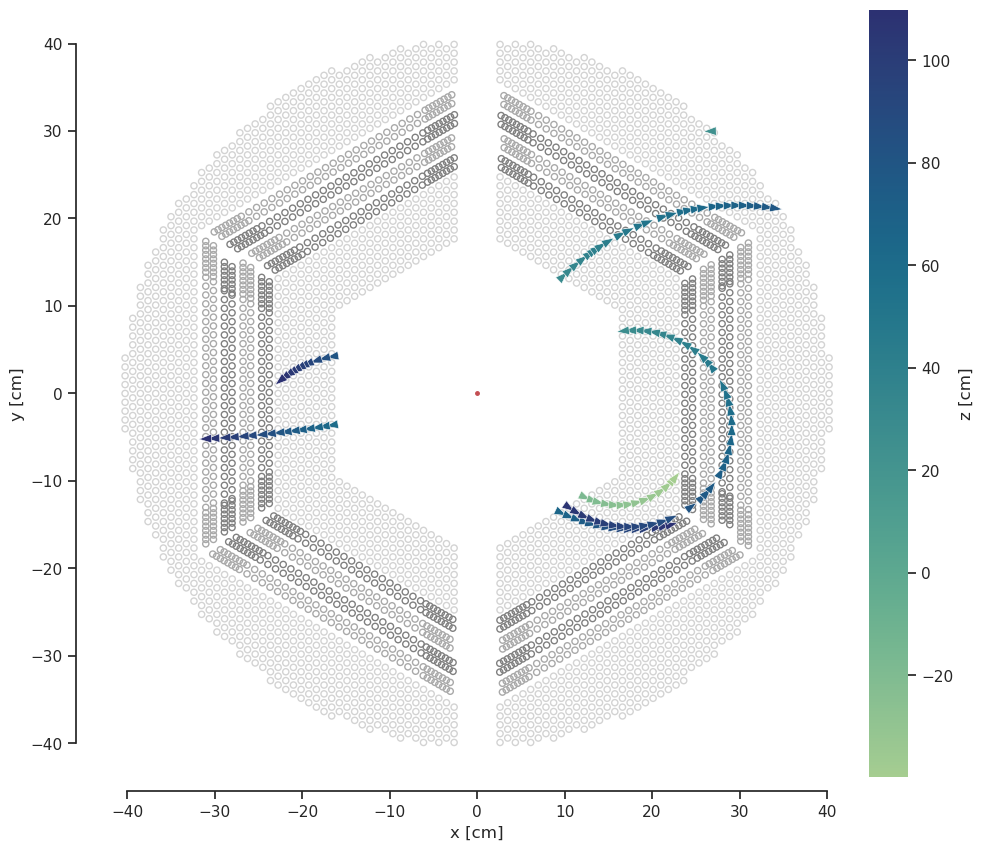

In [14]:
# find out what the maximum and minimum z values are
min_z = np.min(stt_point["Z"])
print("Min z: ", min_z, " cm")
max_z = np.max(stt_point["Z"])
print("Max z: ", max_z, " cm")

# Create a normalization object
zNorm = mcolors.Normalize(vmin=min_z, vmax=max_z)

plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme(color_codes=True)
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plotSTT(useGrayScale=True)

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

# plot the STT MC points as arrows with the arrow direction being the momentum direction and the
# color representing the z coordinate
sttQuiver = ax.quiver(
    stt_point["X"],
    stt_point["Y"],
    stt_normPx,
    stt_normPy,
    stt_point["Z"],
    pivot="mid",
    cmap="crest",
    scale=0.7,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=zNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

sns.despine(fig=fig, ax=ax, offset=10, trim=True)

# # Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add and format the color bar
cbar = fig.colorbar(sttQuiver, cax=cax, orientation="vertical", label="z [cm]")
cbar.outline.set_visible(False)

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

fig.tight_layout()

imgPath = imagePath + "/xyProjectionZ_" + str(entry_id)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Time

Min t:  1.0499770641326904  ns
Max t:  25.600261688232422  ns
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionTime_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionTime_0.pdf


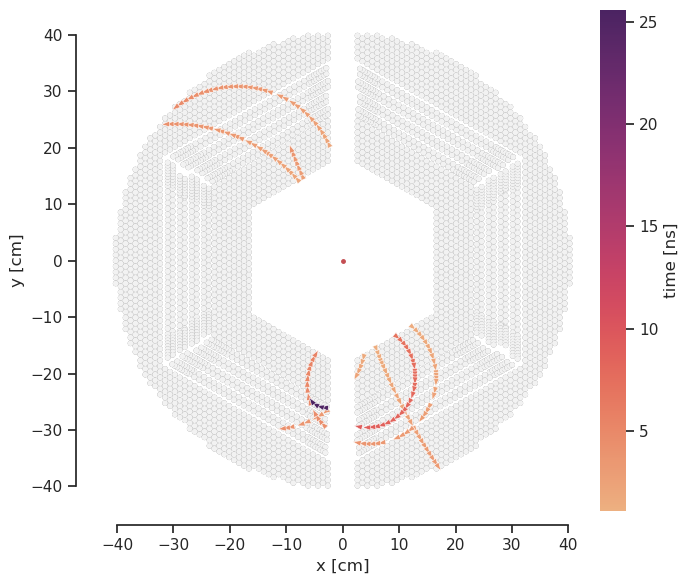

In [15]:
# find out what the maximum and minimum t values are
times = np.concatenate((stt_t, mvd_t))
min_t = np.min(times)
print("Min t: ", min_t, " ns")
max_t = np.max(times)
print("Max t: ", max_t, " ns")

# Create a normalization object
tNorm = mcolors.Normalize(vmin=min_t, vmax=max_t)

plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme(color_codes=True)
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

# Plot the STT in the background
for index, row in data.iterrows():
    sttOuterTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]), row["outerRadius[cm]"], fc="gray", ec="None"
    )
    ax.add_patch(sttOuterTube)
    sttInnerTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]),
        row["innerRadius[cm]"],
        fc="white",
        ec="None",
        alpha=0.9,
    )
    ax.add_patch(sttInnerTube)

# plot the STT MC points as arrows with the arrow direction being the momentum direction and the
# color representing the time
sttQuiver = ax.quiver(
    stt_x,
    stt_y,
    stt_normPx,
    stt_normPy,
    stt_t,
    pivot="mid",
    cmap="flare",
    scale=0.7,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=tNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

sns.despine(fig=fig, ax=ax, offset=10, trim=True)

# # Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add and format the color bar
cbar = fig.colorbar(sttQuiver, cax=cax, orientation="vertical", label="time [ns]")
cbar.outline.set_visible(False)

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

fig.tight_layout()

imgPath = imagePath + "/xyProjectionTime_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Momentum

Min p:  0.01568048998542473  GeV
Max p:  2.7742482467353504  GeV
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionMomentum_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionMomentum_0.pdf


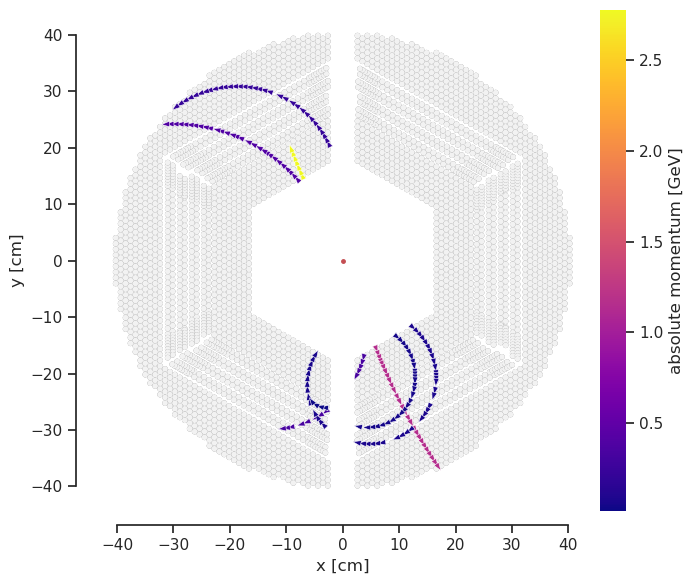

In [16]:
# find out what the maximum and minimum p values are
momenta = np.concatenate((stt_p, mvd_p))
min_p = np.min(momenta)
print("Min p: ", min_p, " GeV")
max_p = np.max(momenta)
print("Max p: ", max_p, " GeV")

# Create a normalization object
pNorm = mcolors.Normalize(vmin=min_p, vmax=max_p)

plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme(color_codes=True)
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

# Plot the STT in the background
for index, row in data.iterrows():
    sttOuterTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]), row["outerRadius[cm]"], fc="gray", ec="None"
    )
    ax.add_patch(sttOuterTube)
    sttInnerTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]),
        row["innerRadius[cm]"],
        fc="white",
        ec="None",
        alpha=0.9,
    )
    ax.add_patch(sttInnerTube)

# plot the STT MC points as arrows with the arrow direction being the momentum direction and the
# color representing the momentum magnitude
sttQuiver = ax.quiver(
    stt_x,
    stt_y,
    stt_normPx,
    stt_normPy,
    stt_p,
    pivot="mid",
    cmap="plasma",
    scale=0.7,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=pNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

sns.despine(fig=fig, ax=ax, offset=10, trim=True)

# # Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add and format the color bar
cbar = fig.colorbar(
    sttQuiver, cax=cax, orientation="vertical", label="absolute momentum [GeV]"
)
cbar.outline.set_visible(False)

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

fig.tight_layout()

imgPath = imagePath + "/xyProjectionMomentum_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Energy Loss

Min dE:  1.3985356872581178e-06  GeV
Max dE:  0.00014099999680183828  GeV
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionEnergyLoss_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionEnergyLoss_0.pdf


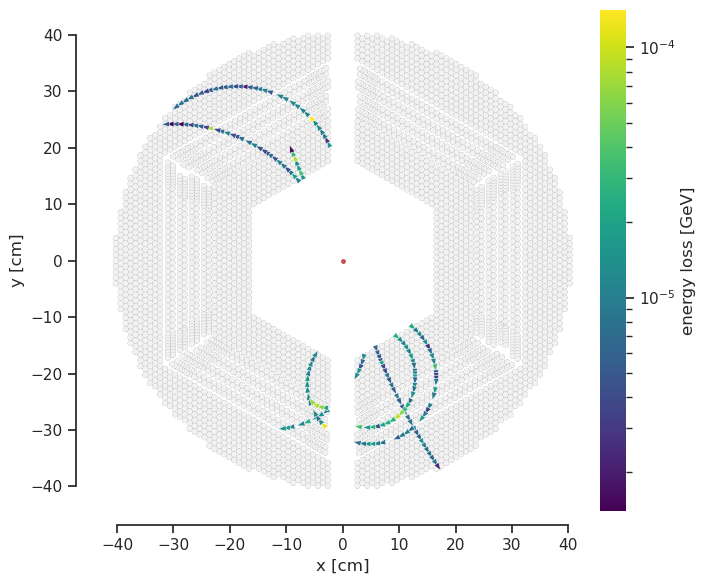

In [17]:
# find out what the maximum and minimum dE values are
energyLoss = np.concatenate((stt_dE, mvd_dE))
min_dE = np.min(energyLoss)
print("Min dE: ", min_dE, " GeV")
max_dE = np.max(energyLoss)
print("Max dE: ", max_dE, " GeV")

# Create a normalization object
dENorm = mcolors.LogNorm(vmin=min_dE, vmax=max_dE)

plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme(color_codes=True)
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

# Plot the STT in the background
for index, row in data.iterrows():
    sttOuterTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]), row["outerRadius[cm]"], fc="gray", ec="None"
    )
    ax.add_patch(sttOuterTube)
    sttInnerTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]),
        row["innerRadius[cm]"],
        fc="white",
        ec="None",
        alpha=0.9,
    )
    ax.add_patch(sttInnerTube)

# plot the STT MC points as arrows with the arrow direction being the momentum direction and the
# color representing the momentum magnitude
sttQuiver = ax.quiver(
    stt_x,
    stt_y,
    stt_normPx,
    stt_normPy,
    stt_dE,
    pivot="mid",
    cmap="viridis",
    scale=0.7,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=dENorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

# Remove the top and right spines
sns.despine(fig=fig, ax=ax, offset=10, trim=True)

# # Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add and format the color bar
cbar = fig.colorbar(
    sttQuiver, cax=cax, orientation="vertical", label="energy loss [GeV]"
)
cbar.outline.set_visible(False)

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

fig.tight_layout()

imgPath = imagePath + "/xyProjectionEnergyLoss_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Particle Tracks & Vertices

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Saving png image to:  .Test/xyProjectionTracks_1.png
Saving pdf image to:  .Test/xyProjectionTracks_1.pdf


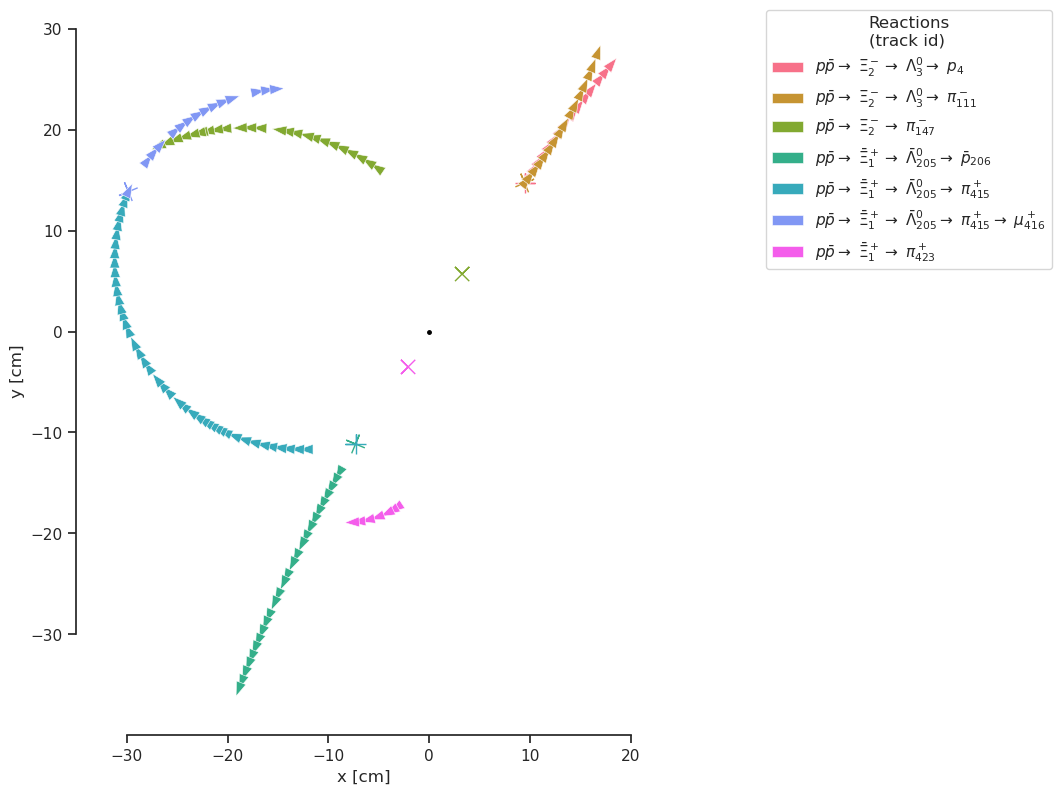

In [26]:
plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme(color_codes=True)
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="black")

# Plot the STT in the background
# for index, row in data.iterrows():
#         sttOuterTube = patches.Circle((row['x'], row['y']), row['outerRadius'], fc='gray', ec="None")
#         ax.add_patch(sttOuterTube)
#         sttInnerTube = patches.Circle((row['x'], row['y']), row['innerRadius'], fc='white', ec="None", alpha=0.9)
#         ax.add_patch(sttInnerTube)

numTracks = len(tubeIDPerTrack)
colors = sns.color_palette("husl", numTracks)

trackNum = 0

for trackID in xPointsPerTrack:
    trackLabel = getProcess(
        trackID, mcTrack_pdgId, mcTrack_motherId, mcTrack_2ndMotherId
    )
    trackNormPx = xMomentaPerTrack[trackID] / np.sqrt(
        xMomentaPerTrack[trackID] ** 2 + yMomentaPerTrack[trackID] ** 2
    )
    trackNormPy = yMomentaPerTrack[trackID] / np.sqrt(
        xMomentaPerTrack[trackID] ** 2 + yMomentaPerTrack[trackID] ** 2
    )
    create_rotated_cross(
        mcTrack_vertex_x[trackID],
        mcTrack_vertex_y[trackID],
        22.5 * trackNum,
        ax,
        size=1,
        color=colors[trackNum],
        lw=1,
    )
    ax.quiver(
        xPointsPerTrack[trackID],
        yPointsPerTrack[trackID],
        trackNormPx,
        trackNormPy,
        pivot="middle",
        angles="xy",
        scale_units="xy",
        lw=0.4,
        edgecolor="white",
        headwidth=3.5,
        headlength=5,
        headaxislength=5,
        minlength=0.001,
        units="xy",
        scale=0.7,
        color=colors[trackNum],
        label=trackLabel,
    )
    trackNum += 1
    display(
        Latex(
            f"{trackLabel}: $x = {mcTrack_vertex_x[trackID]:.2f}$ cm  $y = {mcTrack_vertex_y[trackID]:.2f}$ cm"
        )
    )

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

# Set the aspect ratio to be equal
ax.set_aspect("equal")

# Remove the top and right spines
sns.despine(fig=fig, ax=ax, offset=10, trim=True)

fig.tight_layout()

fig.legend(title="Reactions\n(track id)", loc="upper left", bbox_to_anchor=(1, 1))

imgPath = imagePath + "/xyProjectionTracks_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
# plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath + ".pdf")
# plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### Detector Hits

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionDetectorHits_1.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionDetectorHits_1.pdf


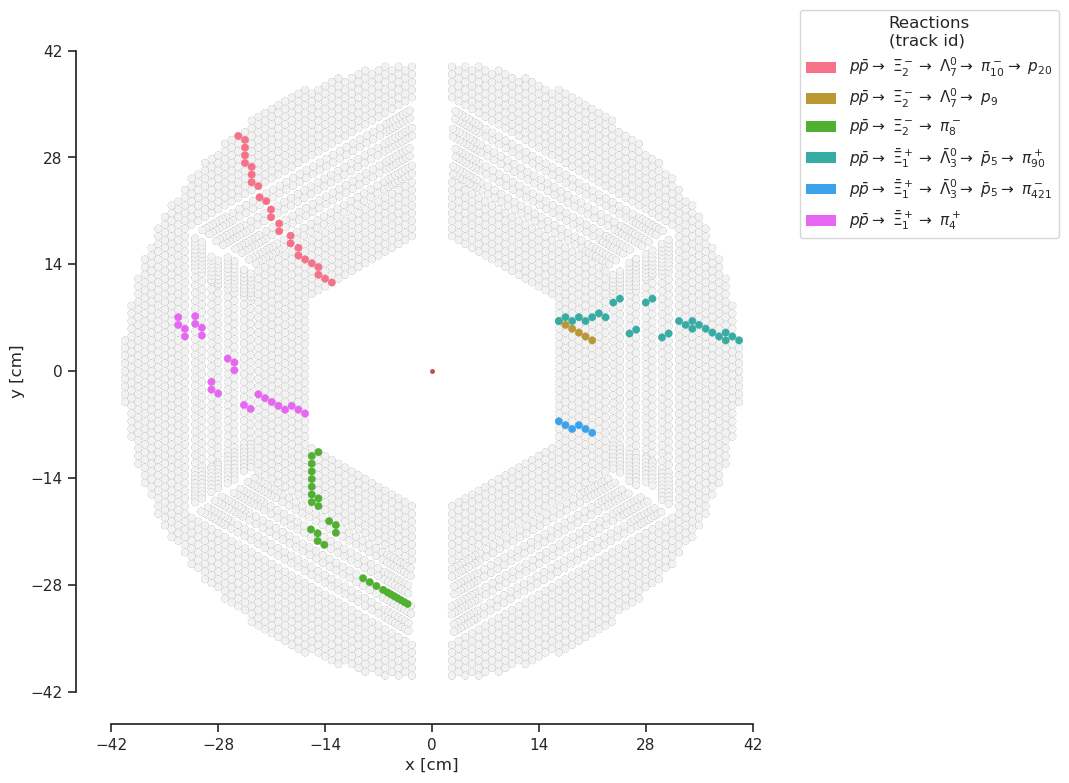

In [28]:
plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme(color_codes=True)
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

# Plot the STT in the background
for index, row in data.iterrows():
    sttOuterTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]), row["outerRadius[cm]"], fc="gray", ec="None"
    )
    ax.add_patch(sttOuterTube)
    sttInnerTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]),
        row["innerRadius[cm]"],
        fc="white",
        ec="None",
        alpha=0.9,
    )
    ax.add_patch(sttInnerTube)

numTracks = len(tubeIDPerTrack)
colors = sns.color_palette("husl", numTracks)

trackNum = 0

legendHandles = []
legendLabels = []

for trackID in tubeIDPerTrack:
    trackLabel = getProcess(
        trackID, mcTrack_pdgId, mcTrack_motherId, mcTrack_2ndMotherId
    )
    for tube in tubeIDPerTrack[trackID]:
        sttHitTube = patches.Circle(
            (
                data.loc[data["tubeID"] == tube, ["x[cm]"]].iat[0, 0],
                data.loc[data["tubeID"] == tube, ["y[cm]"]].iat[0, 0],
            ),
            data.loc[data["tubeID"] == tube, ["outerRadius[cm]"]].iat[0, 0],
            fc=colors[trackNum],
            ec="None",
        )
        ax.add_patch(sttHitTube)
    trackNum += 1
    legendHandles.append(sttHitTube)
    legendLabels.append(trackLabel)

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

# Set the ticks positions to match the data range
x_ticks = np.linspace(-42, 42, num=7)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

# Remove the top and right spines
sns.despine(fig=fig, ax=ax, offset=10, trim=True)

fig.tight_layout()

fig.legend(
    legendHandles,
    legendLabels,
    title="Reactions\n(track id)",
    loc="upper left",
    ncols=1,
    bbox_to_anchor=(1, 1),
)

imgPath = imagePath + "/xyProjectionDetectorHits_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

### Plot xz-Projections with Colormaps for various Parameters

In [20]:
# Normalize the momenta to the xz-projection
stt_normPx = stt_px / np.sqrt(stt_px**2 + stt_pz**2)
stt_normPz = stt_pz / np.sqrt(stt_px**2 + stt_pz**2)

mvd_normPx = mvd_px / np.sqrt(mvd_px**2 + mvd_pz**2)
mvd_normPz = mvd_pz / np.sqrt(mvd_px**2 + mvd_pz**2)


#### y-Position

Min y:  -36.60626983642578  cm
Max y:  30.882190704345703  cm
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionDetectorHits_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/xyProjectionDetectorHits_0.pdf


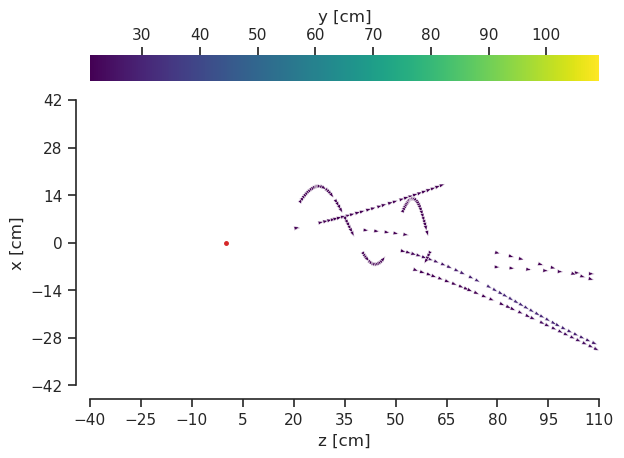

In [21]:
# find out what the maximum and minimum x values are
y_coords = np.concatenate((stt_y, mvd_y))
min_y = np.min(y_coords)
print("Min y: ", min_y, " cm")
max_y = np.max(y_coords)
print("Max y: ", max_y, " cm")

# Create a normalization object
yNorm = mcolors.Normalize(vmin=min_y, vmax=max_y)

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the z coordinate
plt.quiver(
    stt_z,
    stt_x,
    stt_normPz,
    stt_normPx,
    stt_y,
    pivot="mid",
    cmap="viridis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=zNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_x,
    mvd_normPz,
    mvd_normPx,
    mvd_y,
    pivot="mid",
    cmap="viridis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=zNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)

# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("x [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="y [cm]", orientation="horizontal", location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = imagePath + "/xyProjectionDetectorHits_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Time

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/sim/XiAntiXi_xzProjectionTime_0.png


FileNotFoundError: [Errno 2] No such file or directory: '/home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/sim/XiAntiXi/sim/XiAntiXi_xzProjectionTime_0.png'

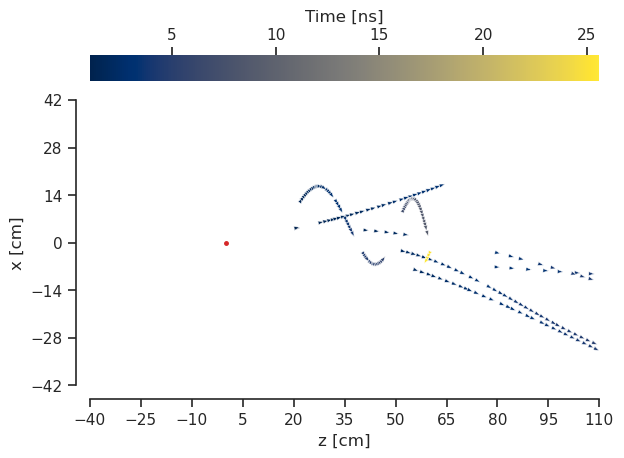

In [22]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the time
plt.quiver(
    stt_z,
    stt_x,
    stt_normPz,
    stt_normPx,
    stt_t,
    pivot="mid",
    cmap="cividis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=tNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_x,
    mvd_normPz,
    mvd_normPx,
    mvd_t,
    pivot="mid",
    cmap="cividis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=tNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)


# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("x [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="Time [ns]", orientation="horizontal", location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = imagePath + "/sim/" + projectName + "_xzProjectionTime_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Momentum

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the momentum
plt.quiver(
    stt_z,
    stt_x,
    stt_normPz,
    stt_normPx,
    stt_p,
    pivot="mid",
    cmap="plasma",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=pNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_x,
    mvd_normPz,
    mvd_normPx,
    mvd_p,
    pivot="mid",
    cmap="plasma",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=pNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)


# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("x [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(
    label="Total Momentum [GeV]", orientation="horizontal", location="top"
)
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = (
    imagePath + "/sim/" + projectName + "_xzProjectionMomentum_" + str(eventNumber)
)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Energy Loss

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the momentum
plt.quiver(
    stt_z,
    stt_x,
    stt_normPz,
    stt_normPx,
    stt_dE,
    pivot="mid",
    cmap="Reds",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=dENorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_x,
    mvd_normPz,
    mvd_normPx,
    mvd_dE,
    pivot="mid",
    cmap="Reds",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=dENorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)


# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("x [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="Energy Loss [GeV]", orientation="horizontal", location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = (
    imagePath + "/sim/" + projectName + "_xzProjectionEnergyLoss_" + str(eventNumber)
)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Tracks

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="black")

# Get the tab20 colormap
tab20 = plt.colormaps["tab20"]
colorNum = 0

for trackID in xPointsPerTrack:
    if mcTrack_pdgId[trackID] == 13:
        trackLabel = r"$\mu^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -13:
        trackLabel = r"$\mu^{+}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == 11:
        trackLabel = r"$e^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -11:
        trackLabel = r"$e^{+}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == 211:
        trackLabel = r"$\pi^{+}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -211:
        trackLabel = r"$\pi^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == 2212:
        trackLabel = r"$p_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -2212:
        trackLabel = r"$\bar{p}_{" + str(trackID) + r"}$"
    else:
        trackLabel: str = "PDG ID: " + str(mcTrack_pdgId[trackID])
    tab20color = tab20(colorNum % 20)
    trackNormPx = xMomentaPerTrack[trackID] / np.sqrt(
        xMomentaPerTrack[trackID] ** 2 + zMomentaPerTrack[trackID] ** 2
    )
    trackNormPz = zMomentaPerTrack[trackID] / np.sqrt(
        xMomentaPerTrack[trackID] ** 2 + zMomentaPerTrack[trackID] ** 2
    )
    ax.quiver(
        zPointsPerTrack[trackID],
        xPointsPerTrack[trackID],
        trackNormPz,
        trackNormPx,
        pivot="middle",
        angles="xy",
        scale_units="xy",
        units="xy",
        scale=0.6,
        lw=0.4,
        edgecolor="white",
        headwidth=3.5,
        headlength=5,
        headaxislength=5,
        minlength=0.001,
        color=tab20color,
        label=trackLabel,
    )
    colorNum += 1

# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("x [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
plt.gca().set_aspect("equal")

fig.tight_layout()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

plt.legend(
    title="Particles (track id)",
    loc="upper center",
    ncols=len(xPointsPerTrack) / 2,
    bbox_to_anchor=(0.5, 1.3),
)

imgPath = imagePath + "/sim/" + projectName + "_xzTracks_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

### Plot yz-Projections with Colormaps for various Parameters

In [ ]:
# Normalize the momenta to the xz-projection
stt_normPy = stt_py / np.sqrt(stt_py**2 + stt_pz**2)
stt_normPz = stt_pz / np.sqrt(stt_py**2 + stt_pz**2)

mvd_normPy = mvd_py / np.sqrt(mvd_py**2 + mvd_pz**2)
mvd_normPz = mvd_pz / np.sqrt(mvd_py**2 + mvd_pz**2)


#### x-Position

In [ ]:
# find out what the maximum and minimum x values are
x_coords = np.concatenate((stt_x, mvd_x))
min_x = np.min(x_coords)
print("Min x: ", min_x, " cm")
max_x = np.max(x_coords)
print("Max x: ", max_x, " cm")

# Create a normalization object
xNorm = mcolors.Normalize(vmin=min_x, vmax=max_x)

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the z coordinate
plt.quiver(
    stt_z,
    stt_y,
    stt_normPz,
    stt_normPy,
    stt_x,
    pivot="mid",
    cmap="viridis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=xNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_y,
    mvd_normPz,
    mvd_normPy,
    mvd_x,
    pivot="mid",
    cmap="viridis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=xNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)


# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="x [cm]", orientation="horizontal", location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = imagePath + "/sim/" + projectName + "_yzProjection_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Time

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the time
plt.quiver(
    stt_z,
    stt_y,
    stt_normPz,
    stt_normPy,
    stt_t,
    pivot="mid",
    cmap="cividis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=tNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_y,
    mvd_normPz,
    mvd_normPy,
    mvd_t,
    pivot="mid",
    cmap="cividis",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=tNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)


# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="Time [ns]", orientation="horizontal", location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = imagePath + "/sim/" + projectName + "_yzProjectionTime_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Momentum

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the momentum
plt.quiver(
    stt_z,
    stt_y,
    stt_normPz,
    stt_normPy,
    stt_p,
    pivot="mid",
    cmap="plasma",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=pNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_y,
    mvd_normPz,
    mvd_normPy,
    mvd_p,
    pivot="mid",
    cmap="plasma",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=pNorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)


# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(
    label="Total Momentum [GeV]", orientation="horizontal", location="top"
)
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = (
    imagePath + "/sim/" + projectName + "_yzProjectionMomentum_" + str(eventNumber)
)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Energy Loss

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="tab:red")

# plot the STT & MVD MC points as arrows with the arrow direction being the momentum direction and the
# color representing the momentum
plt.quiver(
    stt_z,
    stt_y,
    stt_normPz,
    stt_normPy,
    stt_dE,
    pivot="mid",
    cmap="Reds",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=dENorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)
plt.quiver(
    mvd_z,
    mvd_y,
    mvd_normPz,
    mvd_normPy,
    mvd_dE,
    pivot="mid",
    cmap="Reds",
    scale=0.6,
    scale_units="xy",
    angles="xy",
    units="xy",
    norm=dENorm,
    lw=0.4,
    edgecolor="white",
    headwidth=3.5,
    headlength=5,
    headaxislength=5,
    minlength=0.001,
)


# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Make the axis look fancier
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="Energy Loss [GeV]", orientation="horizontal", location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect("equal")

fig.tight_layout()

imgPath = (
    imagePath + "/sim/" + projectName + "_yzProjectionEnergyLoss_" + str(eventNumber)
)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

#### Tracks

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0, 0, marker=".", ms=5, color="black")

# Get the tab20 colormap
tab20 = plt.colormaps["tab20"]
colorNum = 0

for trackID in xPointsPerTrack:
    if mcTrack_pdgId[trackID] == 13:
        trackLabel = r"$\mu^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -13:
        trackLabel = r"$\mu^{+}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == 11:
        trackLabel = r"$e^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -11:
        trackLabel = r"$e^{+}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == 211:
        trackLabel = r"$\pi^{+}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -211:
        trackLabel = r"$\pi^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == 2212:
        trackLabel = r"$p_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -2212:
        trackLabel = r"$\bar{p}_{" + str(trackID) + r"}$"
    else:
        trackLabel: str = "PDG ID: " + str(mcTrack_pdgId[trackID])
    tab20color = tab20(colorNum % 20)
    trackNormPy = yMomentaPerTrack[trackID] / np.sqrt(
        yMomentaPerTrack[trackID] ** 2 + zMomentaPerTrack[trackID] ** 2
    )
    trackNormPz = zMomentaPerTrack[trackID] / np.sqrt(
        yMomentaPerTrack[trackID] ** 2 + zMomentaPerTrack[trackID] ** 2
    )
    ax.quiver(
        zPointsPerTrack[trackID],
        yPointsPerTrack[trackID],
        trackNormPz,
        trackNormPy,
        pivot="middle",
        angles="xy",
        scale_units="xy",
        units="xy",
        scale=0.6,
        lw=0.4,
        edgecolor="white",
        headwidth=3.5,
        headlength=5,
        headaxislength=5,
        minlength=0.001,
        color=tab20color,
        label=trackLabel,
    )
    colorNum += 1

# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-40, 110)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-40, 110, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6, width=1.2)

# Set the aspect ratio to be equal
plt.gca().set_aspect("equal")

fig.tight_layout()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

plt.legend(
    title="Particles (track id)",
    loc="upper center",
    ncols=len(xPointsPerTrack) / 2,
    bbox_to_anchor=(0.5, 1.3),
)

imgPath = imagePath + "/sim/" + projectName + "_yzTracks_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

### 3D Scatter Plot

In [ ]:
# Normalize the momenta
stt_normPx = stt_px / np.sqrt(stt_px**2 + stt_py**2 + stt_pz**2)
stt_normPy = stt_py / np.sqrt(stt_px**2 + stt_py**2 + stt_pz**2)
stt_normPz = stt_pz / np.sqrt(stt_px**2 + stt_py**2 + stt_pz**2)

mvd_normPx = mvd_px / np.sqrt(mvd_px**2 + mvd_py**2 + mvd_pz**2)
mvd_normPy = mvd_py / np.sqrt(mvd_px**2 + mvd_py**2 + mvd_pz**2)
mvd_normPz = mvd_pz / np.sqrt(mvd_px**2 + mvd_py**2 + mvd_pz**2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the IP
scatter = ax.scatter(0, 0, 0, marker=".", color="black")

# Set the axis labels and limits
xCoords = np.concatenate((stt_x, mvd_x))
yCoords = np.concatenate((stt_y, mvd_y))
zCoords = np.concatenate((stt_z, mvd_z))

min_x = np.min(xCoords)
max_x = np.max(xCoords)
min_y = np.min(yCoords)
max_y = np.max(yCoords)
min_z = np.min(zCoords)
max_z = np.max(zCoords)

plt.xlabel("z [cm]")
plt.xlim(min_z, max_z)
plt.ylabel("x [cm]")
plt.ylim(min_x, max_x)
ax.set_zlabel("y [cm]")
ax.set_zlim(min_y, max_y)

# Get the tab20 colormap
tab20 = plt.colormaps["tab20"]
colorNum = 0

for trackID in yPointsPerTrack:
    if mcTrack_pdgId[trackID] == 13:
        trackLabel = r"$\mu^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -13:
        trackLabel = r"$\mu^{+}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == 11:
        trackLabel = r"$e^{-}_{" + str(trackID) + r"}$"
    elif mcTrack_pdgId[trackID] == -11:
        trackLabel = r"$e^{+}_{" + str(trackID) + r"}$"
    else:
        trackLabel = "PDG ID: " + str(mcTrack_pdgId[trackID])
    tab20color = tab20(colorNum % 20)
    trackAbsMom = np.sqrt(
        xMomentaPerTrack[trackID] ** 2
        + yMomentaPerTrack[trackID] ** 2
        + zMomentaPerTrack[trackID] ** 2
    )
    trackNormPx = xMomentaPerTrack[trackID] / trackAbsMom
    trackNormPy = yMomentaPerTrack[trackID] / trackAbsMom
    trackNormPz = zMomentaPerTrack[trackID] / trackAbsMom
    ax.quiver(
        zPointsPerTrack[trackID],
        yPointsPerTrack[trackID],
        xPointsPerTrack[trackID],
        trackNormPz,
        trackNormPy,
        trackNormPx,
        pivot="middle",
        color=tab20color,
        label=trackLabel,
        length=1,
        normalize=True,
        arrow_length_ratio=2,
        lw=0.6,
    )
    colorNum += 1


# Set the aspect ratio to be equal
plt.gca().set_aspect("equal")

fig.tight_layout()

plt.legend(
    title="Particles\n(track id)", loc="upper left", ncol=1, bbox_to_anchor=(-0.2, 0.85)
)

imgPath = imagePath + "/sim/" + projectName + "_3dTracks_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")